# Titanic Kaggle Competition

## 1. Getting data

In [7]:
import os 

import numpy as np # linear algebra
import pandas as pd # data managment, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization

import seaborn as sns # data visualization

from sklearn.impute import SimpleImputer # data preprocessing
from sklearn.preprocessing import OneHotEncoder # data preprocessing
from sklearn.compose import ColumnTransformer # data preprocessing
from sklearn.pipeline import Pipeline # data preprocessing
from sklearn.ensemble import RandomForestClassifier # model
from sklearn.model_selection import cross_val_score # model evaluation

In [8]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [9]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## 2. Exploratory Data Analysis

### Does the dataset contain missing values?

In [10]:
train.info() # Dataset missing values summary

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


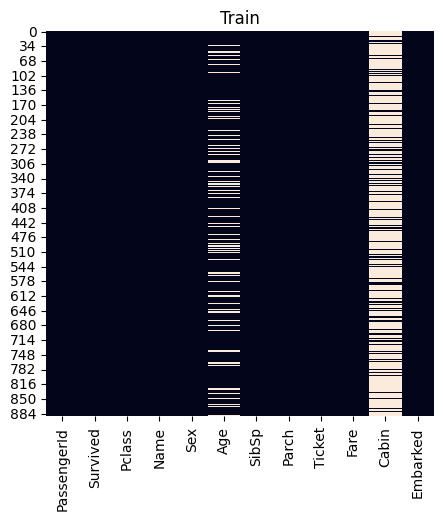

In [11]:
# Creates missing value heatmap
def plot_missing_data(dataset, title):
    fig,ax = plt.subplots(figsize=(5, 5))
    plt.title(title)
    sns.heatmap(dataset.isnull(), cbar=False)

plot_missing_data(train, 'Train')

### How many passengers survived?

In [12]:
train["Survived"].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [13]:
train["Survived"].value_counts(normalize=True)

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

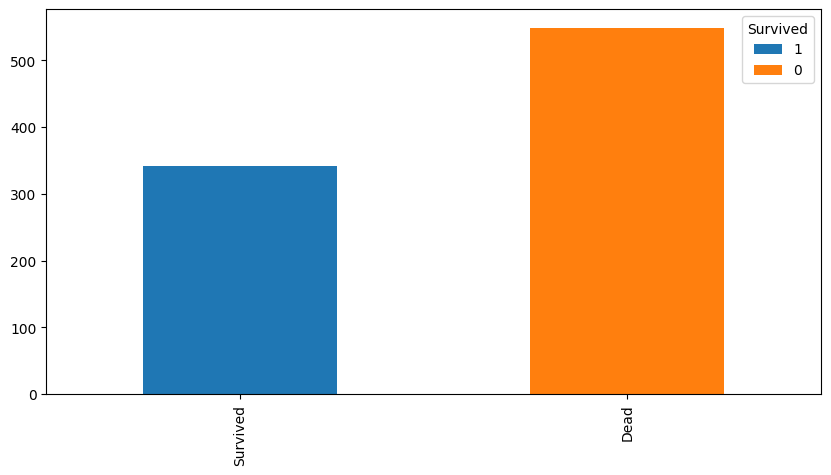

In [15]:
# Plotting bar charts
def bar_chart_stacked(dataset, feature, stacked=True):
    survived = dataset[dataset['Survived']==1][feature].value_counts()
    dead = dataset[dataset['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived, dead])
    df.index = ['Survived', 'Dead']
    df.plot(kind='bar', stacked=stacked, figsize=(10, 5))

bar_chart_stacked(train,"Survived")

### Is the likelihood of survival dependent on gender?

In [17]:
train["Sex"].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [18]:
train.groupby("Sex").Survived.mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

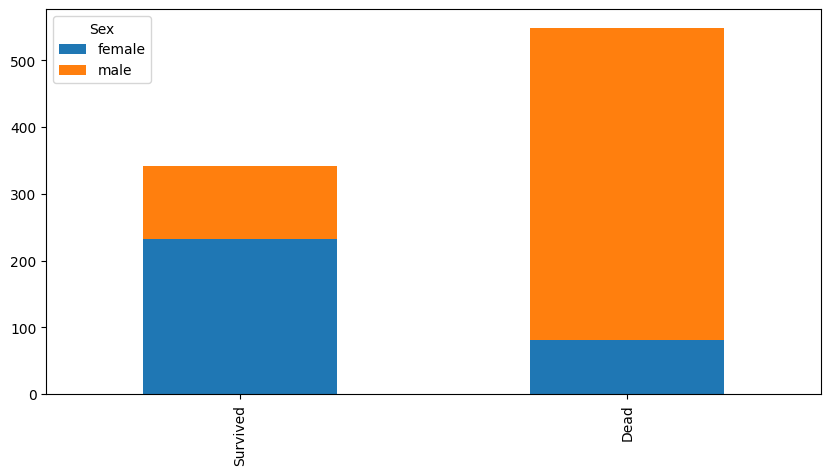

In [22]:
bar_chart_stacked(train, "Sex")

### Could it be that the class to which a passenger belonged correlates with the probability of survival?

In [23]:
pd.pivot_table(train, index="Survived", columns="Pclass", values="Ticket", aggfunc="count")

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


In [24]:
train.groupby(["Pclass"]).Survived.mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

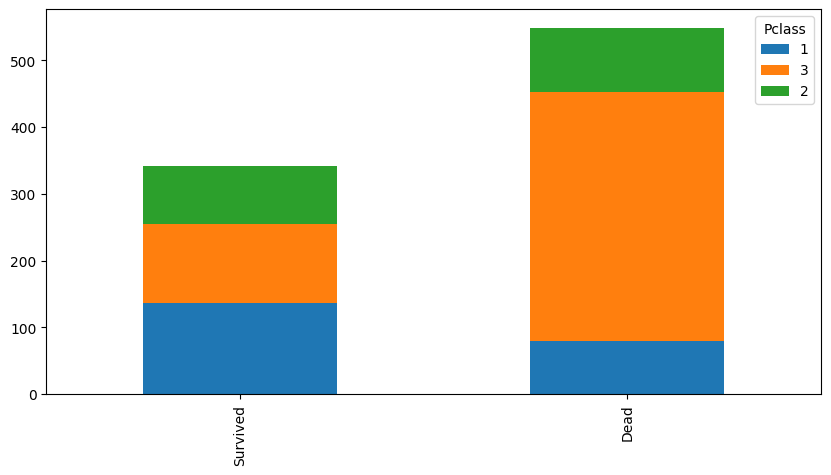

In [25]:
bar_chart_stacked(train, 'Pclass', 'Survived')